## 1. Princial Componets Analysis (PCA)

#### 대략적인 PCA 알고리즘
1. 데이터 셋 준비
2. 데이터 셋을 피처별로 표준화
3. 피처 데이터의 공분산 행렬 구하기
4. 3에서 구한 공분산 행렬의 고유값, 고유 벡터 구하기
5. 고유값을 큰 순서대로 내림차순 정렬
6. d차원으로 줄이고 싶은 경우, 크기 순서대로 d개의 고윳값 선정
7. 6에서 선정한 고유값에 대응하는 고유 벡터로 새로운 행렬 생성
8. 1에서 준비한 오리지널 데이터를 7에서 만든 새로운 공간으로 투영

#### 

### 1. Import Packages and Modules

In [2]:
import numpy as np
from numpy.linalg import eig
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

### 2. Load Data and EDA

In [3]:
# 13개 변수 / 3개 범주

raw_wine = datasets.load_wine()
print(raw_wine.DESCR) # Dataset Description # 13 Features with 3 Classes

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

### 3. Data Split and Standardization

In [4]:
X = raw_wine.data  # Features
y = raw_wine.target # Target


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Standardization

In [5]:
# PCA는 정규화가 필수

std_scale = StandardScaler()
std_scale.fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)

### 5. Principa Components Analysis (PCA)

In [6]:
# 주성분 n(2)개를 사용해서 PCA
# Train / Test 모두!

pca = PCA(n_components=2) # n_components: Number of principal components to use (hyperparameter)
pca.fit(X_train_std)

X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

### 6. Shape of Data Before and After PCA

In [7]:
# 기존 142x13의 데이터가 -> 142x2로 잘 바뀜

print(X_train_std.shape)
print(X_train_pca.shape) # number of componets = 2

# 36x13 -> 36x2

print(X_test_std.shape)
print(X_test_pca.shape) # number of componets = 2

(124, 13)
(124, 2)
(54, 13)
(54, 2)


### 7. Check Covariance Matrix, Eigen Value, Eigen Vector

#### Covariance Matrix

In [8]:
# PCA 분석을 위해 원본 데이터에서 공분산 행렬을 확인

print("공분산 행렬: \n",pca.get_covariance()) # Covariance Matrix
print("공분산 행렬 차원: \n", pca.get_covariance().shape) # 13x13

공분산 행렬: 
 [[ 1.11061274  0.08204736  0.2620712  -0.22698621  0.30280443  0.34136106
   0.28200254 -0.17805591  0.22577996  0.47112849 -0.0811502   0.06515448
   0.54348018]
 [ 0.08204736  0.89289411  0.1667861   0.23968674 -0.01962281 -0.3680701
  -0.44293369  0.3330986  -0.30931797  0.36115941 -0.44937132 -0.4718626
  -0.13878138]
 [ 0.2620712   0.1667861   0.68647277 -0.00270575  0.11248242  0.00130893
  -0.04929376  0.0505066  -0.02303006  0.31709879 -0.19506603 -0.14543798
   0.16431792]
 [-0.22698621  0.23968674 -0.00270575  0.81516478 -0.16362219 -0.44594934
  -0.47336945  0.33927165 -0.34474685  0.04149048 -0.29979209 -0.38868275
  -0.3719523 ]
 [ 0.30280443 -0.01962281  0.11248242 -0.16362219  0.68901342  0.24738011
   0.22829419 -0.15335216  0.17497152  0.19164282  0.03370886  0.11642496
   0.31678483]
 [ 0.34136106 -0.3680701   0.00130893 -0.44594934  0.24738011  1.20192449
   0.72211492 -0.51781199  0.52568312 -0.06865877  0.46013731  0.59472791
   0.56392177]
 [ 0.28200254 

#### Eigenvalue

In [9]:
# method 1 
# eig 함수를 사용해서 공분산 행렬의 eigen value와 eigen vector 구하기
w,v = eig(pca.get_covariance())
print('고유값(Eigenvalue)은:\n', w)

고유값(Eigenvalue)은:
 [0.52245749 2.46635032 4.8923083  0.52245749 0.52245749 0.52245749
 0.52245749 0.52245749 0.52245749 0.52245749 0.52245749 0.52245749
 0.52245749]


In [10]:
# method 2
# pca 모듈 사용
print('고유값(Eigenvalue)은:\n', pca.explained_variance_) # n_components = 2

고유값(Eigenvalue)은:
 [4.8923083  2.46635032]


#### 같은 값이 나옴을 알 수 있다!

#### Eigenvector

In [11]:
print('고유행렬(Eigenvector): \n', v) # 13개의 고유값에 대응하는 13개의 고유 벡터

고유행렬(Eigenvector): 
 [[-0.85105316  0.50417079 -0.14669811 -0.12991839 -0.19827768  0.102751
   0.13973956  0.08241494  0.07649143 -0.01502343  0.21585823  0.36472588
   0.10368042]
 [ 0.10170636  0.24216889  0.24224554 -0.7281973  -0.00746122  0.0355536
   0.19722824  0.17058085  0.04787972  0.08028794  0.27574835  0.00473708
  -0.02017595]
 [ 0.16485227  0.28698484  0.02993442  0.05128356  0.27062718 -0.09612144
   0.00919091 -0.13769725  0.16908577 -0.35430426 -0.27816056 -0.39907068
   0.21733725]
 [-0.08230894 -0.06468718  0.25519002 -0.0583551  -0.38977675  0.1297222
  -0.51504038  0.59604319  0.31522259 -0.42288412 -0.31107025  0.21920419
   0.23468883]
 [ 0.15704872  0.22995385 -0.12079772  0.22182642 -0.52501737  0.62533074
  -0.21242671 -0.03112128  0.36006084 -0.22115542 -0.06624115  0.1383718
   0.44664196]
 [ 0.12258532  0.09363991 -0.38934455  0.24225249 -0.07130421 -0.49781523
   0.46618087  0.33409878 -0.28011484 -0.04557797  0.29625188  0.12777168
  -0.37436464]
 [ 0.0


#### 실제 PCA에서는 eigenvalue decompostion이 아닌 singular value decomposition(SVD)을 사용한다.
#### 그 이유는 다음과 같다.
1. SVD는 메모리상에 covariance matrix를 올리지 않는다 (computing 측면)
2. SVD를 사용해도 결국 eigenvalue decompostion과 같은 결과가 나온다 (SVD와 eigenvalue decomposition은 제곱의 유무 차이..)


### 8. Explained Variance Ratio

In [12]:
# method 1
print('설명된 분산 비율:\n', w / w.sum())

print('PCA의 주성분 2개로 설명된 총 분산 비율:\n', sum([w[0],w[1]]) / w.sum(),"%") # 주성분 1,2

설명된 분산 비율:
 [0.03986493 0.18818926 0.37329648 0.03986493 0.03986493 0.03986493
 0.03986493 0.03986493 0.03986493 0.03986493 0.03986493 0.03986493
 0.03986493]
PCA의 주성분 2개로 설명된 총 분산 비율:
 0.22805419394773194 %


In [13]:
# method 2
print('PCA에서 설명된 개별 분산 비율 :\n', pca.explained_variance_ratio_) # n_components = 2

print('PCA의 주성분 2개로 설명된 총 분산 비율:\n', sum(pca.explained_variance_ratio_),"%")

PCA에서 설명된 개별 분산 비율 :
 [0.37329648 0.18818926]
PCA의 주성분 2개로 설명된 총 분산 비율:
 0.5614857383009021 %


#### 같은 값이 나옴을 알 수 있다 !

### 9. Create New Dataframe

In [14]:
# 데이터프레임 생성
pca_columns = ['pca_comp1', 'pca_comp2'] # 주성분1, 주성분2
X_train_pca_df = pd.DataFrame(X_train_pca, 
                           columns=pca_columns)

X_train_pca_df['target'] = y_train

X_train_pca_df.head(10) # Dataframe 확인 (label 3개)

,pca_comp1,pca_comp2,target
0,2.598916,-0.004841,0
1,0.158191,2.266596,1
2,-2.637234,-2.664886,2
3,-2.528484,-0.518466,2
4,1.709226,0.917195,1
5,-2.830570,-0.419361,2
6,-2.822519,-1.997631,2
7,1.366180,-0.046391,0
8,-2.465849,0.079323,1
9,-2.285549,0.400967,2


### 10. Visualize

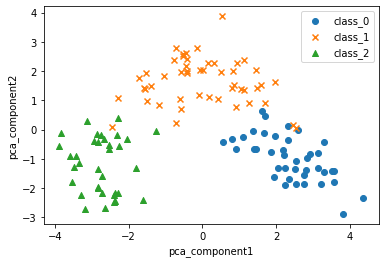

In [15]:
# 주성분 2개 사용해서 class 구별 
df = X_train_pca_df
df_0 = df[df['target']==0]
df_1 = df[df['target']==1]
df_2 = df[df['target']==2]

X_11 = df_0['pca_comp1']
X_12 = df_1['pca_comp1']
X_13 = df_2['pca_comp1']

X_21 = df_0['pca_comp2']
X_22 = df_1['pca_comp2']
X_23 = df_2['pca_comp2']

target_0 = raw_wine.target_names[0]
target_1 = raw_wine.target_names[1]
target_2 = raw_wine.target_names[2]

plt.scatter(X_11, X_21, 
            marker='o', 
            label=target_0)
plt.scatter(X_12, X_22, 
            marker='x', 
            label=target_1)
plt.scatter(X_13, X_23, 
            marker='^', 
            label=target_2)
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()

### 11. Comparision between Original Data and Data after PCA (random forest)

#### Without PCA (96% ACC)

In [16]:
clf_rf = RandomForestClassifier(max_depth=2, 
                                random_state=0) # Randomforest

clf_rf.fit(X_train_std, y_train) # Fit model

pred_rf = clf_rf.predict(X_test_std) # Predict

accuracy = accuracy_score(y_test, pred_rf) # Acc
print(accuracy)

0.9629629629629629


#### With PCA (98%)

In [17]:
clf_rf_pca = RandomForestClassifier(max_depth=2, 
                                    random_state=0) # Randomforest

clf_rf_pca.fit(X_train_pca, y_train) # Fit model

pred_rf_pca = clf_rf_pca.predict(X_test_pca) # Predict

accuracy_pca = accuracy_score(y_test, pred_rf_pca) # Acc
print(accuracy_pca)

0.9814814814814815
